# Problem Sheet 2


In this problem sheet, you are expected to deal with a classification problem for loan approval. You will develop ability of
- Importing the datas from either online/local data source;
- Performing feature engineering
- Demonstrating the ability to apply various classification models
- Comparing the performance of different models.

1. Import the loan approval data for clients ("loan_approval_dataset.csv") as Pandas Dataframe into your notebook, name it as "loan_data". Are there any missing data? Which features are numerical, and which features are categorical?

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import VotingClassifier

In [19]:
# import datasets
loan_data = pd.read_csv('loan_approval_dataset.csv')

# Missing values check:
print(loan_data.isnull().sum())

# Numerical and categorical columns
nume = loan_data.select_dtypes(include=['int64','float64'])
cate = loan_data.select_dtypes(include=['object'])
print("\n Numerical features:", nume.columns.to_numpy())
print("\n Categorical features:", cate.columns.to_numpy())

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

 Numerical features: ['loan_id' 'no_of_dependents' 'income_annum' 'loan_amount' 'loan_term'
 'cibil_score' 'residential_assets_value' 'commercial_assets_value'
 'luxury_assets_value' 'bank_asset_value']

 Categorical features: ['education' 'self_employed' 'loan_status']


2. Perform the EDA.

           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06       

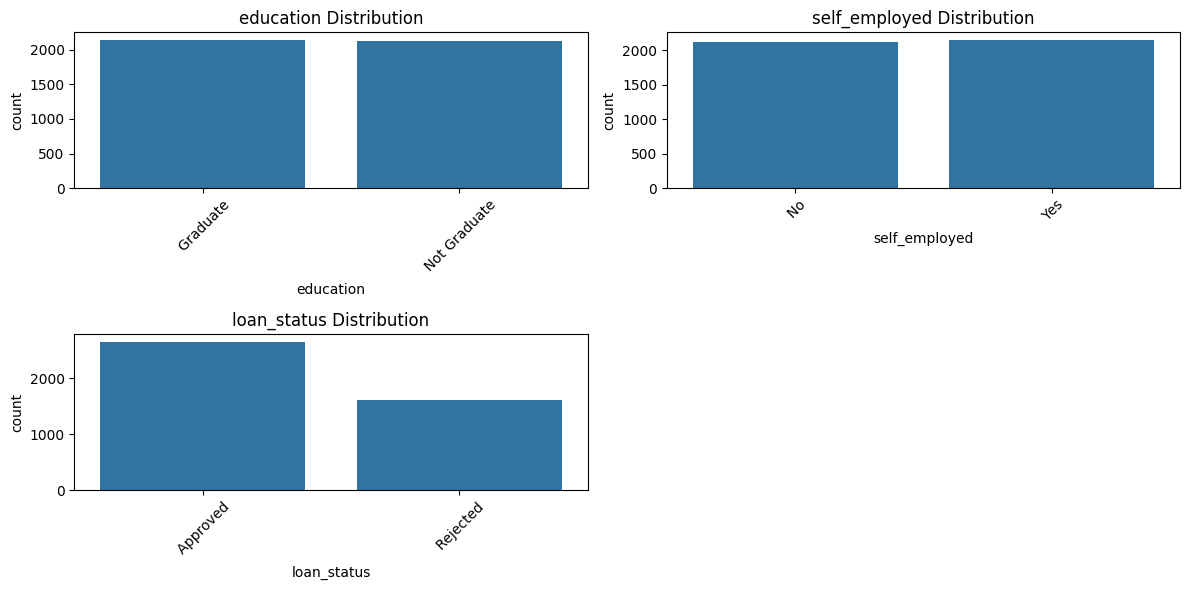


Plotting numerical features correlation...


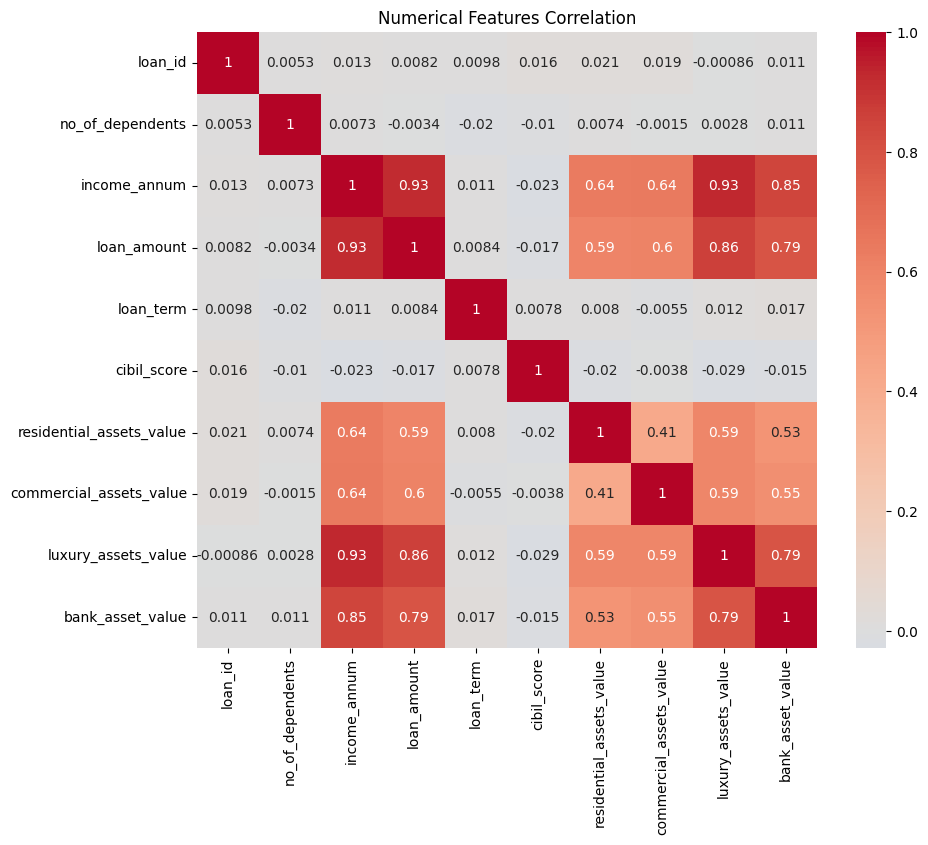

In [20]:
print(nume.describe())
print("\n)")
print(cate.describe())

# Categorical features counts
plt.figure(figsize=(12, 6))
for i, col in enumerate(cate.columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=loan_data)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Numerical features correlation
print("\nPlotting numerical features correlation...")
plt.figure(figsize=(10, 8))
sns.heatmap(nume.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Numerical Features Correlation')
plt.show()

3. Implement a pipeline which:


*   Drop the column 'loan_id' from loan_data.
*   Encode the categorical data
*   Scale the numerical attributes by standardization.



In [21]:
new_set = loan_data.drop(['loan_id'], axis=1)
X = new_set.drop(['loan_status'], axis=1)
y = new_set['loan_status']

num_v = X.select_dtypes(include=['int64','float64']).columns
cat_v = X.select_dtypes(include=['object']).columns

# Create separate pipelines
categorical_pipeline = Pipeline([    # use OneHotEncoder for categorical variables
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numeric_pipeline = Pipeline([  # use StandardScaler for numerical variables
    ('scaler', StandardScaler())
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_v),
    ('cat', categorical_pipeline, cat_v)
])


4.  Split the data into training data (80%) and testing data (20%).

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 3415
Test set size: 854


5. Apply the following classifiers:

*   Linear Regression
*   SVM  
*   Decision Tree
*   Random Forest
*   KNN

For each model, provide the following information:
* Accuracy
* Precision
* Recall
* F1 Score
* Classification Report



In [ ]:
# Clean the label and remove the spaces before or after it
# y_train = y_train.str.strip()
# y_test = y_test.str.strip()
# print("\nUnique labels in y_train:", y_train.unique())
# print("Unique labels in y_test:", y_test.unique())

# Define five classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier())
]

# Create an evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Calculate and return the model evaluation indicators"""
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    # Make sure to use the cleaned labels
    pos_label = 'Approved' if 'Approved' in y_train.unique() else y_train.unique()[0]
    
    return {
        'accuracy': accuracy_score(y_test, y_predict),
        'precision': precision_score(y_test, y_predict, pos_label=pos_label),
        'recall': recall_score(y_test, y_predict, pos_label=pos_label),
        'f1': f1_score(y_test, y_predict, pos_label=pos_label),
        'report': classification_report(y_test, y_predict, target_names=['Rejected', 'Approved'])
    }

# Preprocess the data and evaluate all models
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

for name, model in classifiers:
    metrics = evaluate_model(model, X_train_prep, X_test_prep, y_train, y_test)
    
    print(f"MODEL: {name}")
    print(f"Accuracy: {metrics['accuracy'] : .4f}")
    print(f"Precision: {metrics['precision'] : .4f}")
    print(f"Recall: {metrics['recall'] : .4f}")
    print(f"F1 Score: {metrics['f1'] : .4f}")
    print("\nClassification Report:")
    print(metrics['report'])
    print("=="*50)

MODEL: Logistic Regression
Accuracy:  0.9052
Precision:  0.9205
Recall:  0.9291
F1 Score:  0.9248

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.92      0.93      0.92       536
    Approved       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

MODEL: SVM
Accuracy:  0.9262
Precision:  0.9505
Recall:  0.9310
F1 Score:  0.9406

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.95      0.93      0.94       536
    Approved       0.89      0.92      0.90       318

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854

MODEL: Decision Tree
Accuracy:  0.9754
Precision:  0.9777
Recall:  0.9832
F1 Score:  0.9805

Classification Report:
  

6. Apply the ensemble voting classifier (hard voting), with the above five models being individual classifiers.  Provide the following information:
* Accuracy
* Precision
* Recall
* F1 Score
* Classification Report

In [24]:
# Create and evaluate voting classifier
voting = VotingClassifier(
    estimators=classifiers,
    voting='hard'
)

voting1 = evaluate_model(voting, X_train_prep, X_test_prep, y_train, y_test)

print(f"Hard voting")
print(f"{'Accuracy:'}{voting1['accuracy'] : .4f}")
print(f"{'Precision:'}{voting1['precision'] : .4f}")
print(f"{'Recall:'}{voting1['recall'] : .4f}")
print(f"{'F1 Score:'}{voting1['f1'] : .4f}")

print("\nClassification Report:")
print(voting1['report'])

Hard voting
Accuracy: 0.9520
Precision: 0.9661
Recall: 0.9571
F1 Score: 0.9616

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.97      0.96      0.96       536
    Approved       0.93      0.94      0.94       318

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



7. Among all the models tested so far, which one has the best performance? Explain your answer.

In [25]:
print("The performance of Random Forest is the best among all models. " \
"\nSince it smoothes the anomaly judgment of one single tree by aggregating the predictions of multiple trees." \
"\nIt also can bootstrap, which enables each tree to focus on different data subsets," \
"\nthus avoiding the distortion of the global situation by certain dominant features.")

The performance of Random Forest is the best among all models. 
Since it smoothes the anomaly judgment of one single tree by aggregating the predictions of multiple trees.
It also can bootstrap, which enables each tree to focus on different data subsets,
thus avoiding the distortion of the global situation by certain dominant features.
